In [9]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [10]:
# 遞迴尋找所有 csv
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

root_dir = 'instance/GAIN'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'PMDI_imputed_linear_rolling_on_system_GAIN': 'instance/GAIN/PMDI_imputed_linear_rolling_on_system_GAIN.csv', 'PMDI_imputed_ffill_knn_on_system_GAIN': 'instance/GAIN/PMDI_imputed_ffill_knn_on_system_GAIN.csv', 'PMDI_imputed_ffill_median_on_system_GAIN': 'instance/GAIN/PMDI_imputed_ffill_median_on_system_GAIN.csv', 'PMDI_imputed_ffill_mean_on_system_GAIN': 'instance/GAIN/PMDI_imputed_ffill_mean_on_system_GAIN.csv', 'PMDI_imputed_linear_mean_on_system_GAIN': 'instance/GAIN/PMDI_imputed_linear_mean_on_system_GAIN.csv', 'PMDI_imputed_rolling_median_on_system_GAIN': 'instance/GAIN/PMDI_imputed_rolling_median_on_system_GAIN.csv', 'PMDI_imputed_linear_knn_on_system_GAIN': 'instance/GAIN/PMDI_imputed_linear_knn_on_system_GAIN.csv', 'PMDI_imputed_rolling_knn_on_system_GAIN': 'instance/GAIN/PMDI_imputed_rolling_knn_on_system_GAIN.csv', 'PMDI_imputed_rolling_rolling_on_system_GAIN': 'instance/GAIN/PMDI_imputed_rolling_rolling_on_system_GAIN.csv', 'PMDI_imputed_rolling_mean_on_system_GAIN': 'inst

===== 處理 PMDI_imputed_linear_rolling_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]


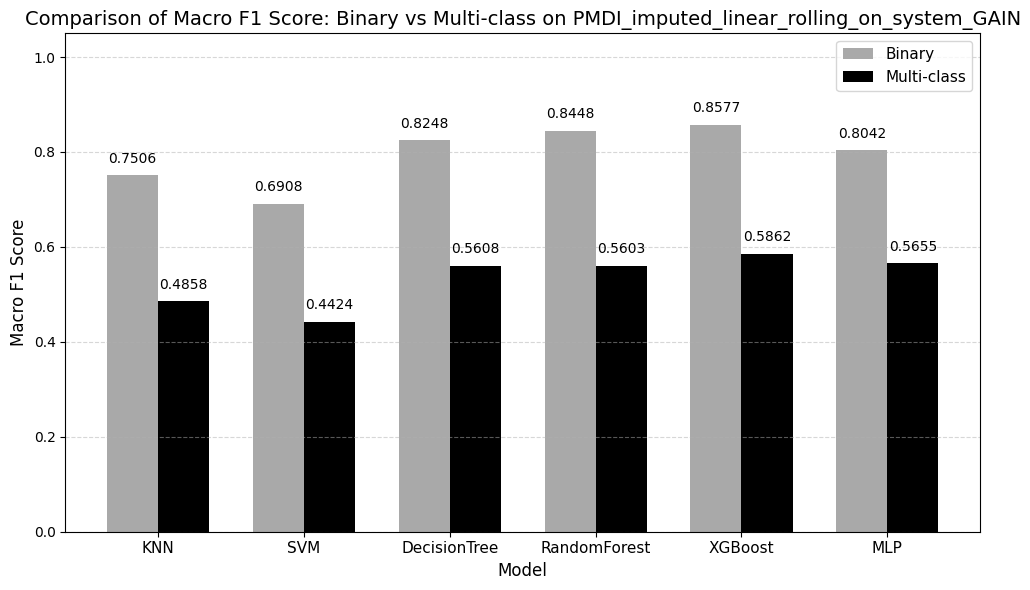

===== 處理 PMDI_imputed_ffill_knn_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]


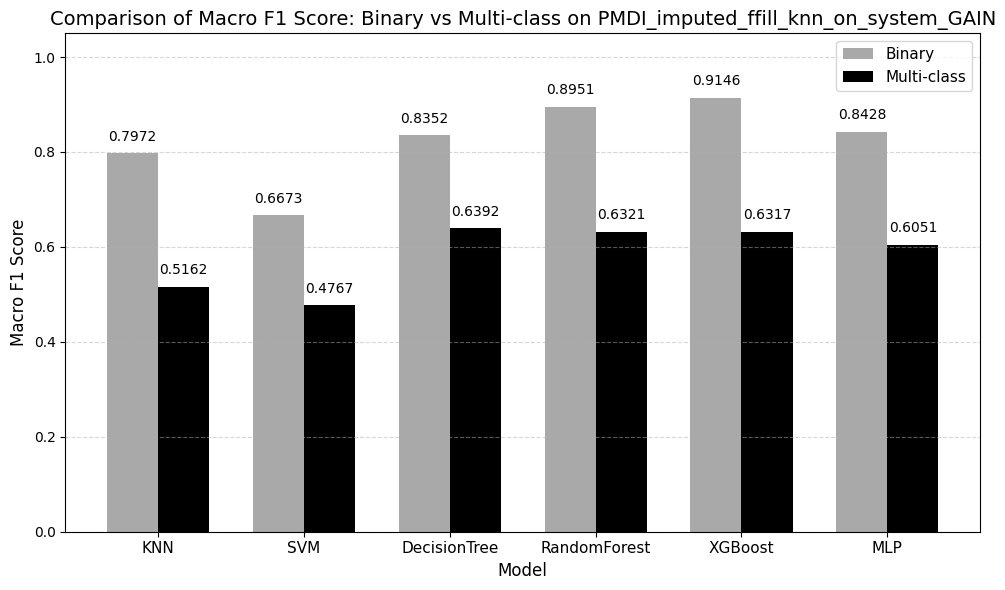

===== 處理 PMDI_imputed_ffill_median_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.15s/it]


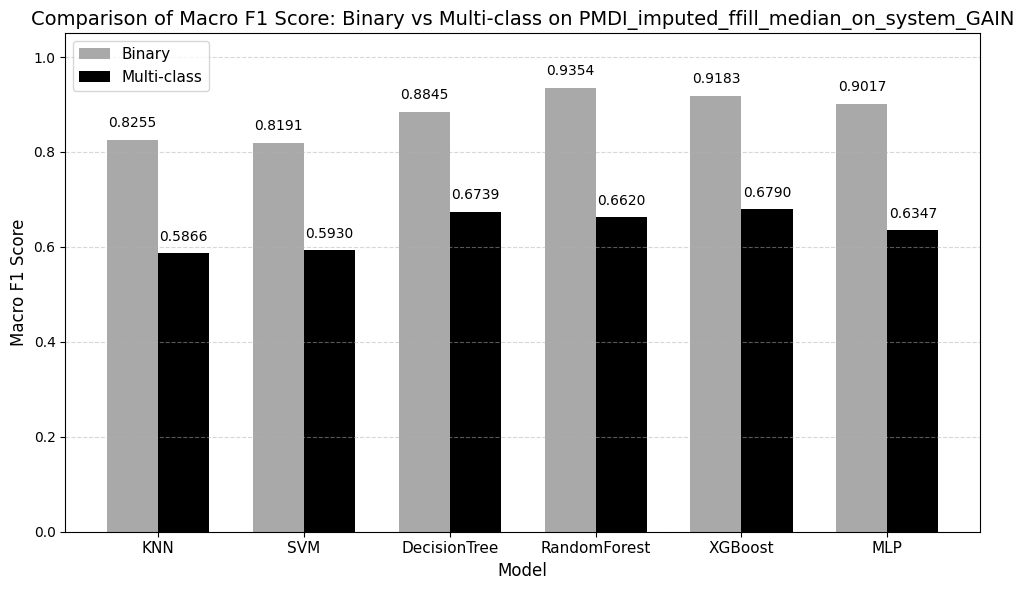

===== 處理 PMDI_imputed_ffill_mean_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]


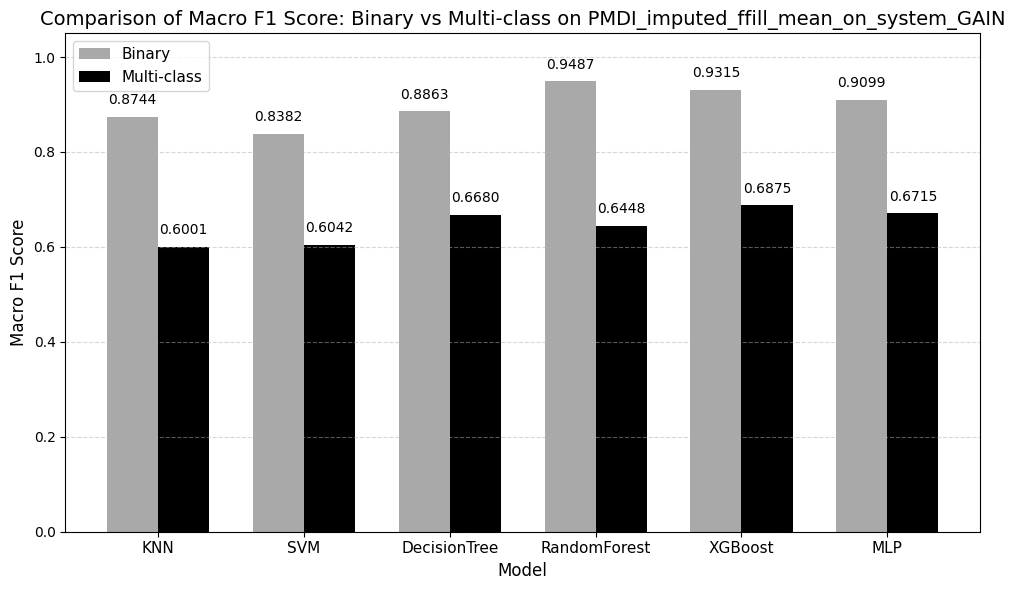

===== 處理 PMDI_imputed_linear_mean_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.02s/it]


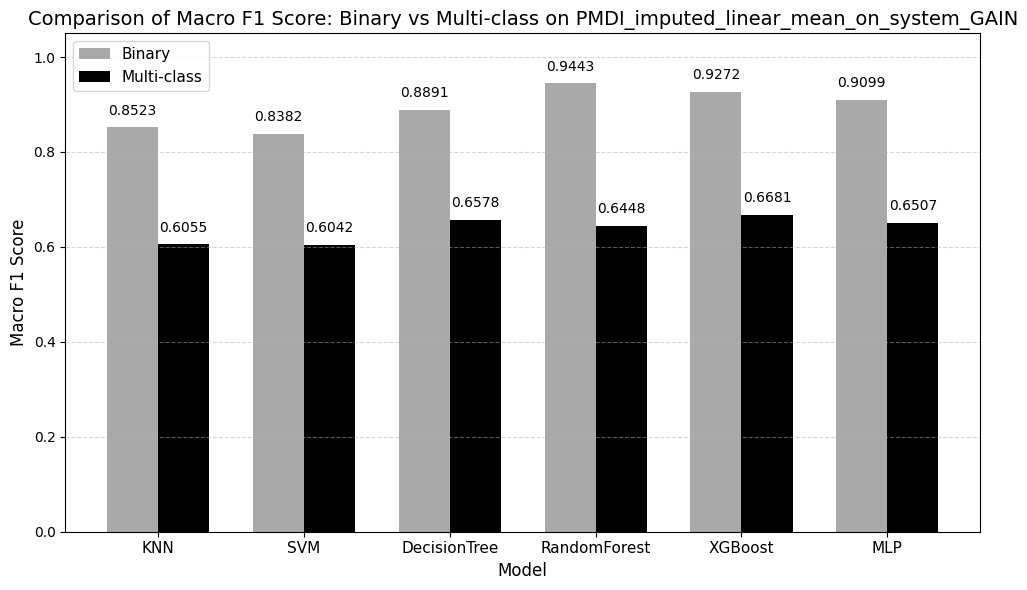

===== 處理 PMDI_imputed_rolling_median_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]


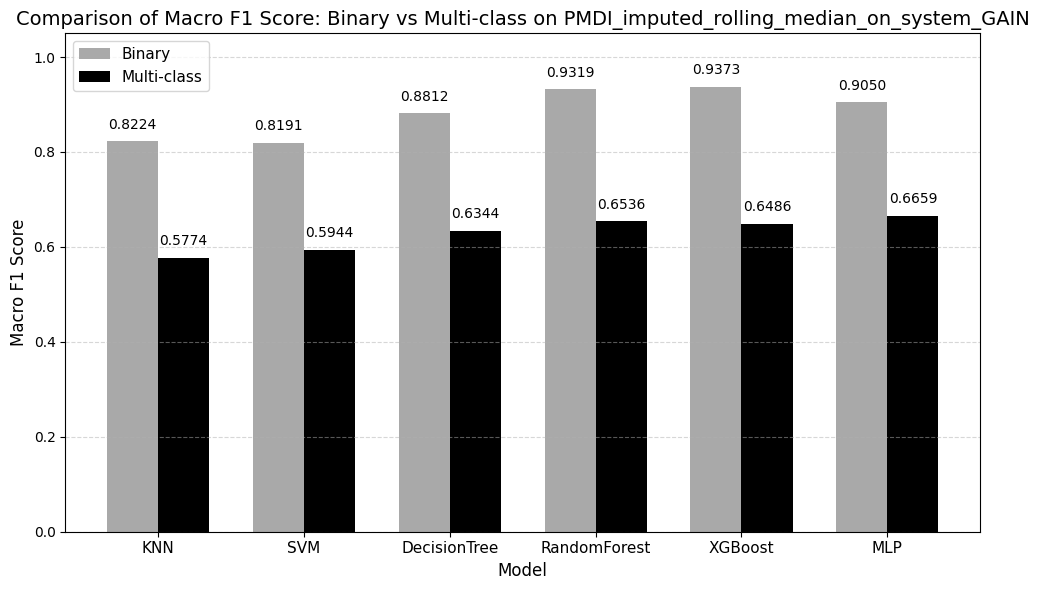

===== 處理 PMDI_imputed_linear_knn_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]


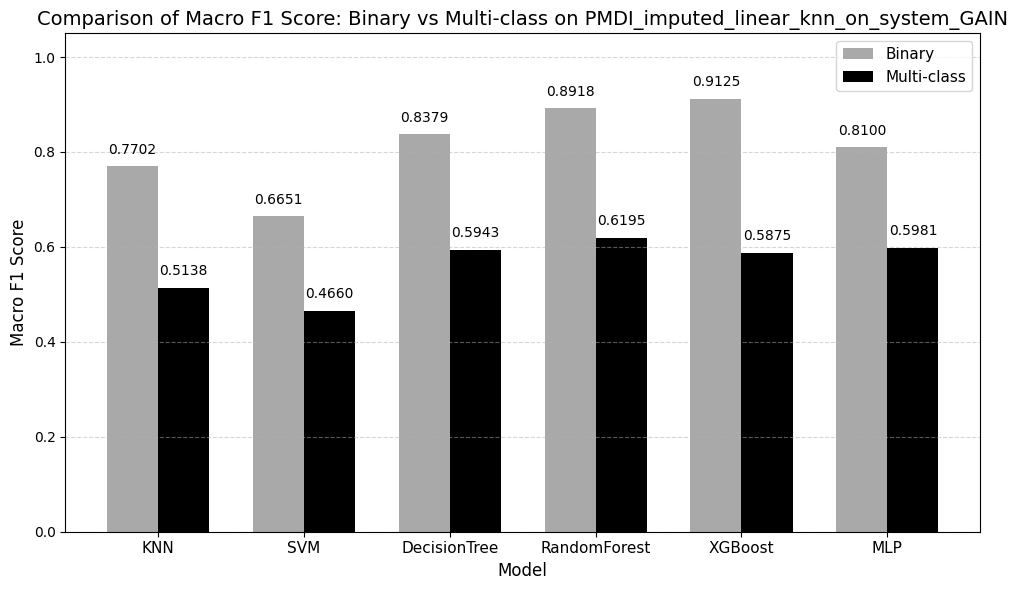

===== 處理 PMDI_imputed_rolling_knn_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]


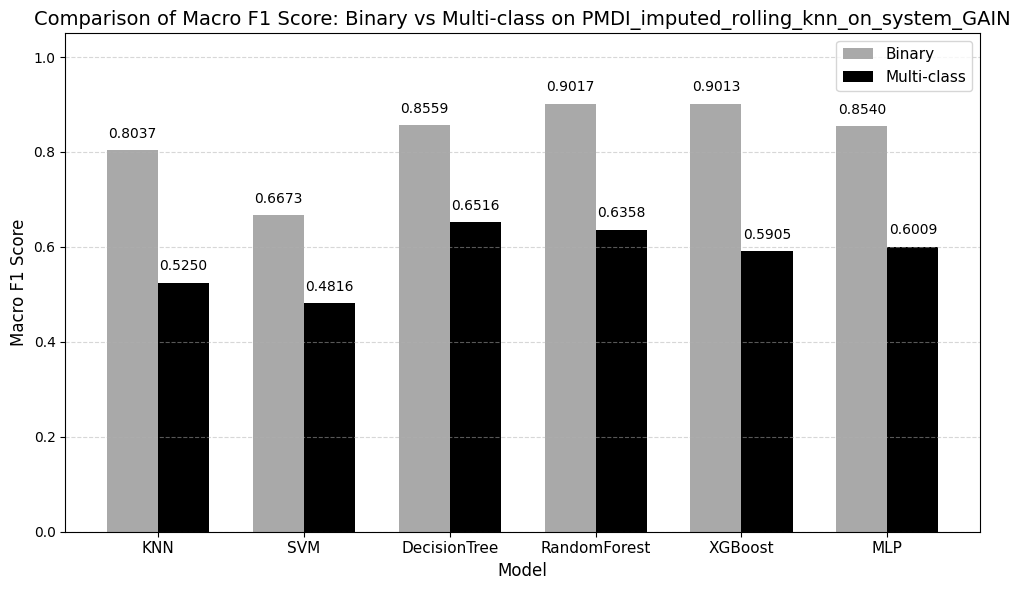

===== 處理 PMDI_imputed_rolling_rolling_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]


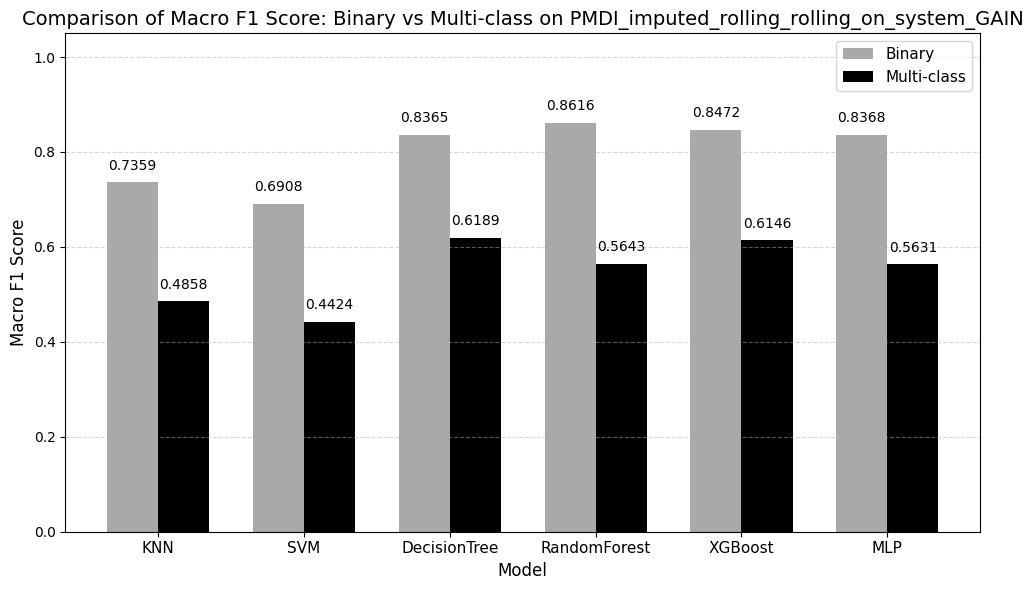

===== 處理 PMDI_imputed_rolling_mean_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.03s/it]


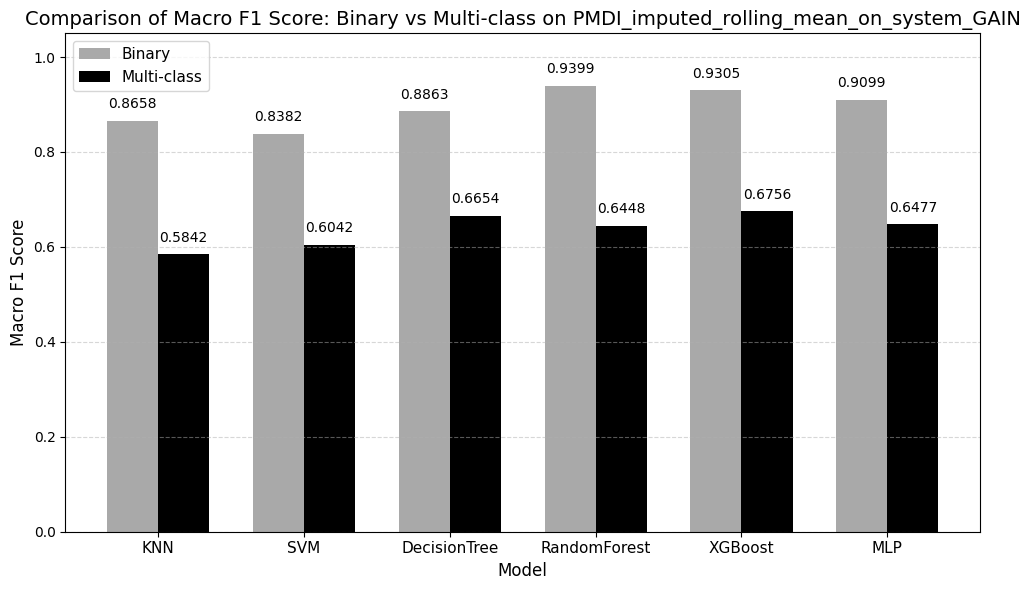

===== 處理 PMDI_imputed_ffill_rolling_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]


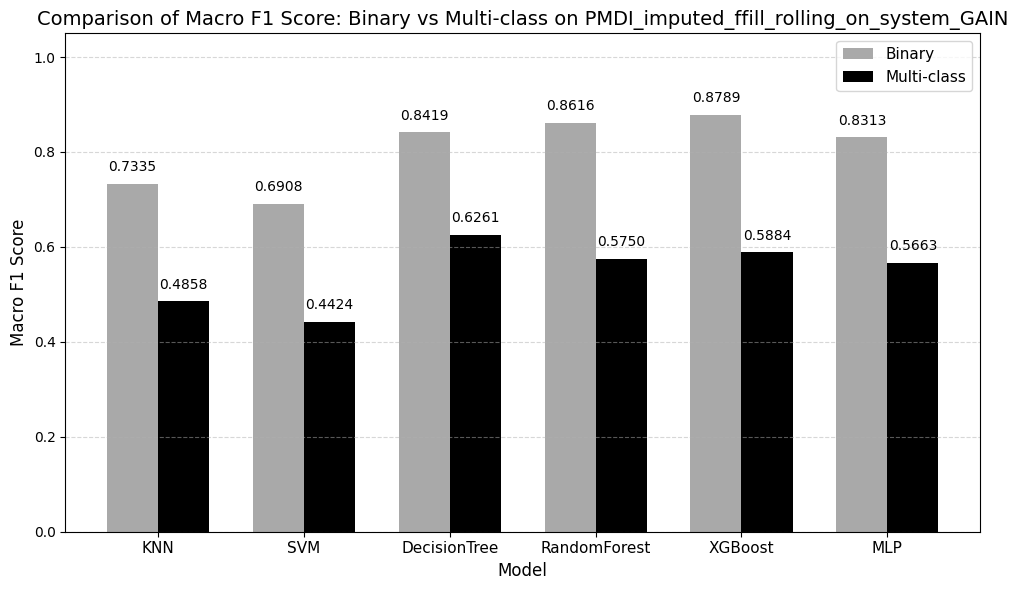

===== 處理 PMDI_imputed_linear_median_on_system_GAIN =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.21s/it]


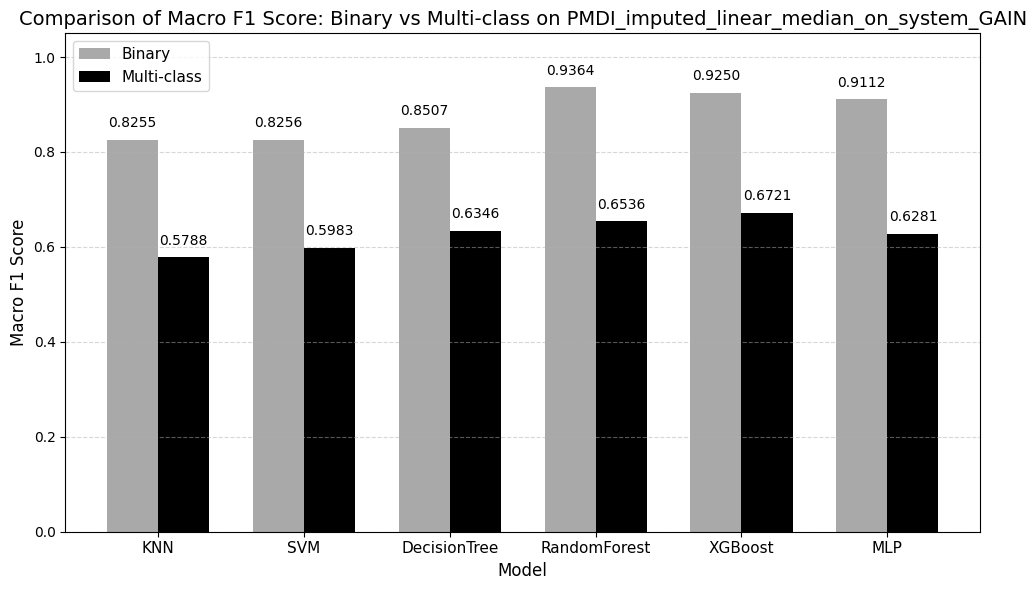

In [11]:
all_results_bin = {}
all_results_multi = {}
np.seterr(all='ignore')

for fname in instance_files:
    print(f'===== 處理 {fname} =====')
    df = load_instance(instance_files[fname])
    df_processed = preprocess(df)
    (X_train_bin, X_test_bin, y_train_bin, y_test_bin,
     X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)
    with suppress_warnings():
        # Binary
        results_bin = evaluate(X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')
        # Multi-class
        results_multi = evaluate(X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')
    all_results_bin[fname] = results_bin['F1']
    all_results_multi[fname] = results_multi['F1']
    # 可選：每個 instance 畫一次 F1 比較圖
    plot_f1_comparison(results_bin, results_multi, fname)

In [5]:
# 彙總所有 instance 的 F1 分數
summary_bin = pd.DataFrame(all_results_bin)
summary_multi = pd.DataFrame(all_results_multi)

print('===== 各 instance 的 Binary F1 分數 =====')
display(summary_bin)
print('===== 各 instance 的 Multi-class F1 分數 =====')
display(summary_multi)

===== 各 instance 的 Binary F1 分數 =====


,PMDI_imputed_linear_median_on_system_autoencoder,PMDI_imputed_linear_mean_on_system_autoencoder,PMDI_imputed_rolling_median_on_system_autoencoder,PMDI_imputed_rolling_knn_on_system_autoencoder,PMDI_imputed_linear_rolling_on_system_autoencoder,PMDI_imputed_ffill_knn_on_system_autoencoder,PMDI_imputed_ffill_median_on_system_autoencoder,PMDI_imputed_linear_knn_on_system_autoencoder,PMDI_imputed_ffill_mean_on_system_autoencoder,PMDI_imputed_rolling_mean_on_system_autoencoder,PMDI_imputed_rolling_rolling_on_system_autoencoder,PMDI_imputed_ffill_rolling_on_system_autoencoder
KNN,0.837842,0.840631,0.849737,0.846503,0.834656,0.843842,0.837842,0.828444,0.816089,0.840631,0.840631,0.822388
SVM,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094,0.491094
DecisionTree,0.91056,0.897965,0.896507,0.916271,0.896373,0.913081,0.893406,0.919506,0.905081,0.896507,0.908659,0.890407
RandomForest,0.904592,0.927363,0.893457,0.911222,0.909241,0.901349,0.901349,0.938229,0.909241,0.911222,0.896641,0.90648
XGBoost,0.930508,0.930508,0.94167,0.927172,0.938229,0.94167,0.934838,0.926115,0.949447,0.945951,0.935756,0.937326
MLP,0.66513,0.63894,0.693095,0.893472,0.579426,0.786122,0.687568,0.570792,0.570792,0.63894,0.79331,0.58288


===== 各 instance 的 Multi-class F1 分數 =====


,PMDI_imputed_linear_median_on_system_autoencoder,PMDI_imputed_linear_mean_on_system_autoencoder,PMDI_imputed_rolling_median_on_system_autoencoder,PMDI_imputed_rolling_knn_on_system_autoencoder,PMDI_imputed_linear_rolling_on_system_autoencoder,PMDI_imputed_ffill_knn_on_system_autoencoder,PMDI_imputed_ffill_median_on_system_autoencoder,PMDI_imputed_linear_knn_on_system_autoencoder,PMDI_imputed_ffill_mean_on_system_autoencoder,PMDI_imputed_rolling_mean_on_system_autoencoder,PMDI_imputed_rolling_rolling_on_system_autoencoder,PMDI_imputed_ffill_rolling_on_system_autoencoder
KNN,0.558116,0.54067,0.543046,0.5447,0.530009,0.543046,0.546953,0.532927,0.520145,0.548333,0.528814,0.554497
SVM,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698,0.163698
DecisionTree,0.664627,0.661403,0.696652,0.706068,0.68825,0.709664,0.69186,0.681413,0.677348,0.686684,0.681069,0.678401
RandomForest,0.709178,0.718379,0.709366,0.697728,0.712726,0.697728,0.694022,0.70505,0.706622,0.718379,0.701307,0.702334
XGBoost,0.705655,0.709361,0.713678,0.705655,0.709361,0.705655,0.709361,0.702437,0.713678,0.70143,0.709361,0.709361
MLP,0.426026,0.417388,0.468272,0.651086,0.445383,0.555271,0.501402,0.447918,0.427049,0.453779,0.440303,0.49855


Exception ignored in: <function ResourceTracker.__del__ at 0x1050e9f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1056e5f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi